# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [ ]:
pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 6.8 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=7e56257fe430ab63d0ff186a16bd7a401a84b94b69f2c57fb9a7c56d2b07f09b
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans

In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Questoin 1
Scatter plot the dataset

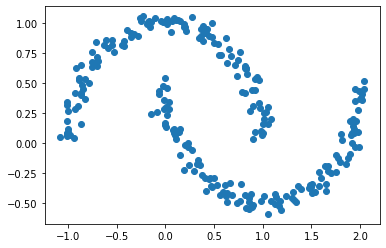

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1])
plt.show()

# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

Will not perform good as it suffers as the geometric shapes of clusters deviates from spherical shapes. (Performs poorly if the clusters have more complex shapes)

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

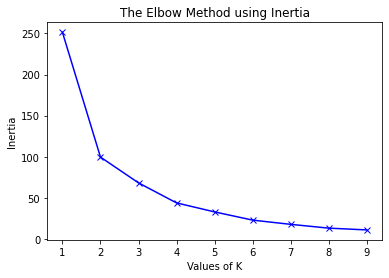

In [ ]:
inertias = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    inertias.append(kmeanModel.inertia_)
    
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

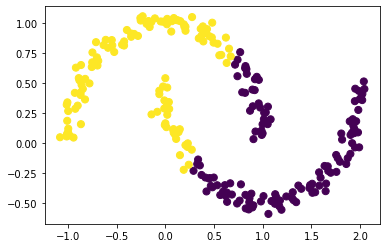

In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

the kmeans algorithm couldn't categorize the data effectively as the algorithm performs poorly with complex shapes.

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

threshold=0

Amount of clusters: 2


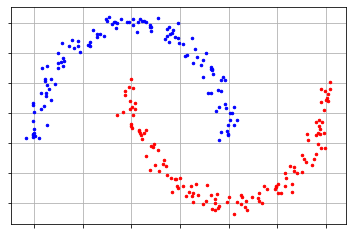

In [ ]:
# create CLIQUE algorithm for processing
intervals = 10  # defines amount of cells in grid in each dimension
threshold = 0   # lets consider each point as non-outlier
clique_instance = clique(X, intervals, threshold)

# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))

# visualize clustering results
clique_visualizer.show_clusters(X, clusters, noise)  # show clustering results

Because clique clustering is better than kmeans when handling complex shapes (deviated from spherical shapes) and it can find overlapping clusters.

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

In [ ]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

Amount of clusters: 4


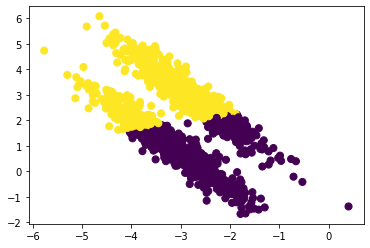

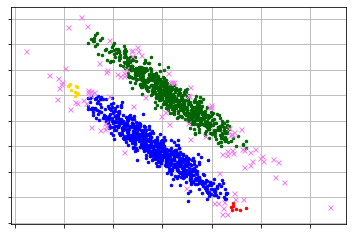

In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_aniso)
y_kmeans = kmeans.predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_kmeans, s=50, cmap='viridis')

# create CLIQUE algorithm for processing
intervals = 15  # defines amount of cells in grid in each dimension
threshold = 6   # lets consider each point as non-outlier
clique_instance = clique(X_aniso, intervals, threshold)

# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))

# visualize clustering results
clique_visualizer.show_clusters(X_aniso, clusters, noise)  # show clustering results

1)There are 4 clusters in the case of clique clustering. The algorithm didn't detect the dense units correctly using the choice of intervals and threshold.

2)The kmeans fails to cluster such shapes because it only considers the distance to the nearest cluster center. 

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [1]:
import numpy as np

def PCA(X,numberOfComponents):
  
  xMean=X-np.mean(X,axis=0)
  covMatrix=np.cov(xMean,rowvar=False)
  eigenValues, eigenVectors=np.linalg.eigh(covMatrix)
  i=np.argsort(eigenValues)[::-1]
  sortedEigenValues=eigenValues[i]
  sortedEigenVectors=eigenVectors[:,i]
  eigenVectorSubset=sortedEigenVectors[:,0:numberOfComponents]
  xAfterReduction=np.dot(eigenVectorSubset.transpose(),xMean.transpose()).transpose()

  return sortedEigenVectors,sortedEigenValues,xAfterReduction

# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [2]:
import numpy as np
from scipy.spatial.distance import cdist

def KMeans(X,numberOfClusters,numberOfIterations):
  i=np.random.choice(len(X),numberOfClusters,replace=False)
  centroids=X[i,:]
  distances=cdist(X,centroids,'euclidean')
  points=np.array([np.argmin(j) for j in distances])

  for _ in range(numberOfIterations): 
        centroids = []
        for i in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = X[points==i].mean(axis=0) 
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(X, centroids ,'euclidean')
        points = np.array([np.argmin(j) for j in distances])
  
  return points